Marketing Campaigns

---



***Problem scenario:***  **Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan,
with a central focus on the four Ps of marketing: product, price, place, and promotion.**

***Problem objective:***
**As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.**

***Data description:***
**The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to
‘Promotion’.**


---



**Importing the Data**

In [2]:
import pandas as pd
import numpy as np
# Load the marketing  dataset
df=pd.read_csv('marketing_data.csv')






**1. After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.**

['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']
['Income']
  Dt_Customer   Income
0  2014-06-16  84835.0
1  2014-06-15  57091.0
2  2014-05-13  67267.0
3  2014-05-11  32474.0
4  2014-04-08  21474.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dt_Customer  2240 non-null   datetime64[ns]
 1   Income       2216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.1 KB
None

Skewness before Data Transformation


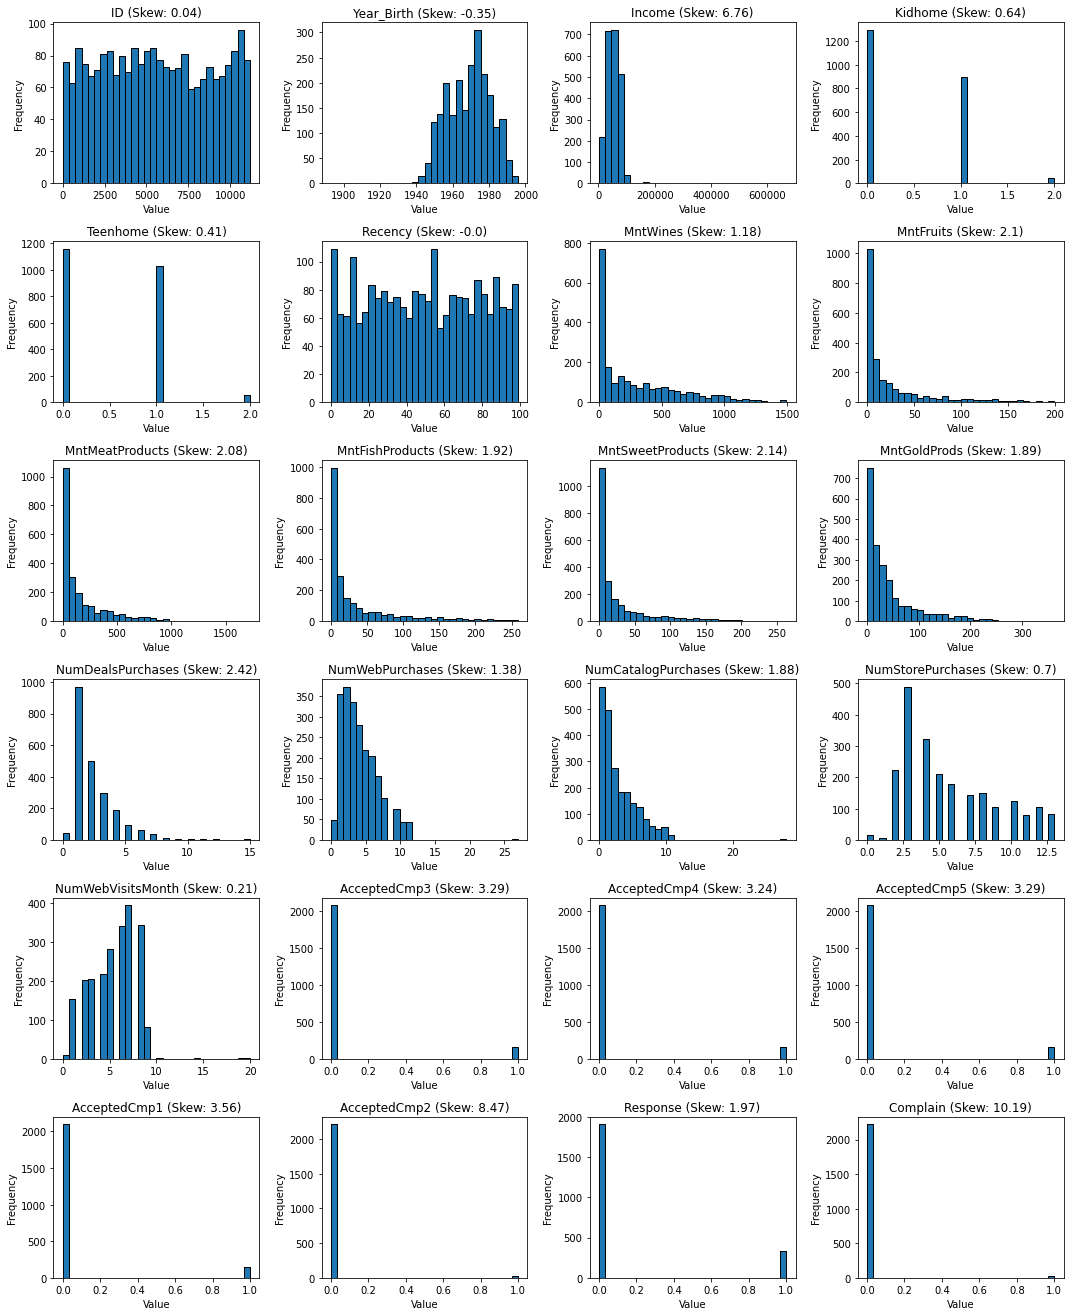

In [3]:

import matplotlib.pyplot as plt

# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Check the column names format
print(df.columns.tolist())

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Print columns to check the stripping is applied
print([col for col in df.columns if 'Income' in col])

# Clean and convert 'Income' to numeric
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

#Verify the conversions
print(df[['Dt_Customer','Income']].head(5))
print(df[['Dt_Customer','Income']].info())

print("\nSkewness before Data Transformation")


# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Determine grid size
num_columns = len(numerical_columns)
rows = (num_columns // 4) + 1  # Adjust rows based on number of columns
cols = 4  # Set number of columns for the grid

# Plot histograms
plt.figure(figsize=(15, rows * 3))  # Adjust figure size dynamically
for i, column in enumerate(numerical_columns, 1):
    if i > rows * cols:  # Avoid exceeding subplot limits
        break
    plt.subplot(rows, cols, i)
    plt.hist(df[column].dropna(), bins=30,  edgecolor='black')
    plt.title(f'{column} (Skew: {df[column].skew().round(2)})')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**2. There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the
categories of education and marital status for data cleaning.**


 Missing Values per Column 
Series([], dtype: int64)

 Missing Income rows
Series([], Name: Income, dtype: float64)

 Rows with remaining missing values for double check
0

 Percentage of missing values 
Series([], dtype: float64)

Heat map of missing values 


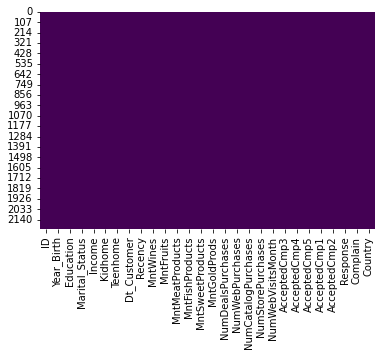


 Check for  duplucated values
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response, Complain, Country]
Index: []

[0 rows x 28 columns]
Unique values in Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique values in Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            53673.944324
            Together          44736.410702
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single      

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the missing vallues in dataset
missing_values = df.isna().sum()
print("\n Missing Values per Column ")
missing_summary = missing_values[missing_values > 0]
print(missing_summary)

print("\n Missing Income rows")
missing_rows = df[df['Income'].isna()]
print(missing_rows['Income'].head(5))


# Verify that there are no remaining missing values
remaining_missing = df.isna().sum().sum()
print("\n Rows with remaining missing values for double check")
print(remaining_missing)

# Verify the percentage of missing values
print("\n Percentage of missing values ")
missing_percentage = df.isna().mean() * 100
missing_percentage_summary=missing_percentage[missing_percentage>0]
print(missing_percentage_summary)

# Heatmap of missing values
print("\nHeat map of missing values ")
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

# Check for duplicate rows
print("\n Check for  duplucated values")
duplicates = df[df.duplicated()]
print(duplicates)


print("Unique values in Education:", df['Education'].unique())
print("Unique values in Marital_Status:", df['Marital_Status'].unique())

# Impute missing values in 'Income' using grouped means
def impute_income(row):
    if pd.isna(row['Income']):
        return np.round(grouped_means.get((row['Education'], row['Marital_Status']), row['Income']),2)
    return  np.round(row['Income'],2)

# Calculate mean Income by Education and Marital_Status
grouped_means = df.groupby(['Education', 'Marital_Status'])['Income'].mean()
print(grouped_means)
df['Income']=df.apply(impute_income,axis=1)
# Verify if missing values are handled
print("\n Verify the values of income after imputing with grouped median based on education & marital status")
print("\nMissing values in Income after imputation:", df['Income'].isna().sum())
df.tail(5)

#verify the data set with integer columns
print('\n Verify the data set with integer columns')
print(df[numerical_columns].describe())



**3. Create variables to represent the total number of children, age, and total spending.**

    a. Derive the total purchases from the number of transactions across the three channels.

In [11]:
import datetime
# Method to calculate age
def calculateAge(birthDate):
    today = str(datetime.date.today());
    curr_year = int(today[:4]);
    age = curr_year-birthDate
    return age

# Variable for the total number of children
df['Total_no_of_children'] = df[['Kidhome','Teenhome'] ].sum(axis=1)

# Variable for the total age
df['Age'] = df['Year_Birth'].apply(calculateAge)


# Variable for  total spending
df['Total_Spending'] = df.MntWines + df.MntFishProducts + df.MntGoldProds + df.MntMeatProducts + df.MntSweetProducts + df.MntFruits

# Variable for  total purchases
df['Total_Purchases'] = df.NumDealsPurchases + df.NumCatalogPurchases + df.NumWebPurchases + df.NumStorePurchases

# Display the updated dataset with the new columns
print(df[['Total_no_of_children', 'Age', 'Total_Spending', 'Total_Purchases']].head())



   Total_no_of_children  Age  Total_Spending  Total_Purchases
0                     0   55            1190               15
1                     0   64             577               18
2                     1   67             251               11
3                     2   58              11                4
4                     1   36              91                8


**4. Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.**


Values before Winsorization
   Total_Spending  Total_Purchases
0            1190               15
1             577               18
2             251               11
3              11                4
4              91                8


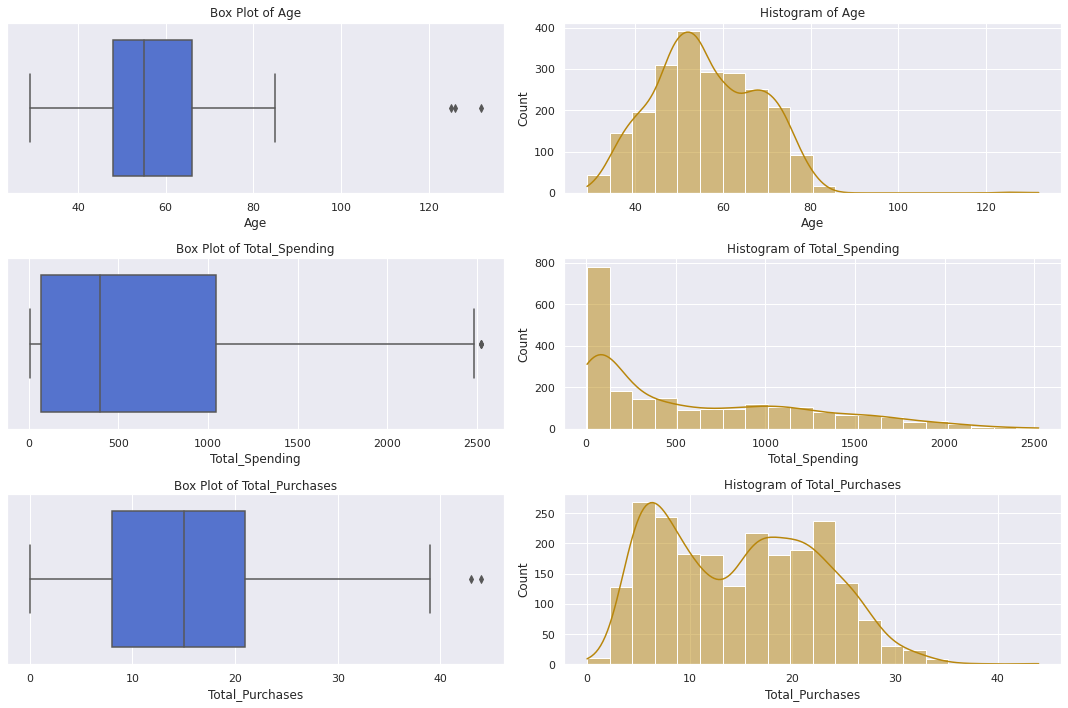


Values after Winsorization
   Total_Spending  Total_Purchases
0            1190               15
1             577               18
2             251               11
3              11                4
4              91                8


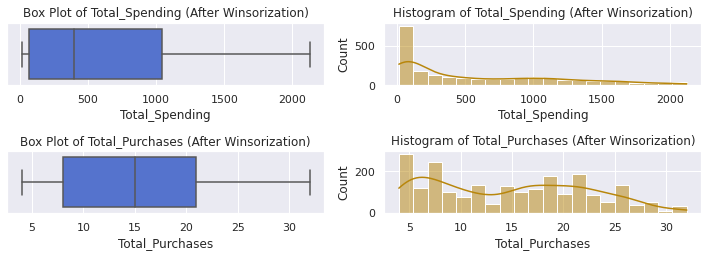

Box cox transformed Income : {lambda_}
Optimal lambda for Total_Spending: 0.1794702569147024
Optimal lambda for Total_Purchases: 0.5100534396027132

 Verify the data after Transformation
   Box_Cox_Total_Spending  Box_Cox_Total_Purchases
0               14.287931                 6.103409
1               11.868446                 6.842143
2                9.448310                 5.002871
3                2.996580                 2.494920
4                6.947840                 4.052529


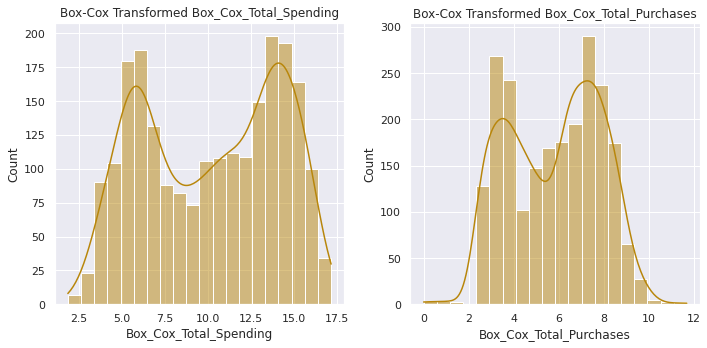

In [12]:
from collections import defaultdict
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import zip_longest

#set the seborn chart back ground
sns.set(style="darkgrid", palette="icefire")
sns.color_palette("crest", as_cmap=True)

# Columns before winsorization
print('\nValues before Winsorization')
print(df[['Total_Spending', 'Total_Purchases']].head())

# Set up the figure size for better visualization
plt.figure(figsize=(15, 10))

# Specify the columns to analyze
columns_to_analyze = ['Age', 'Total_Spending', 'Total_Purchases']

# Loop through the columns to create box plots and histograms
for i, column in enumerate(columns_to_analyze, 1):
    # Box plot
    plt.subplot(3, 2, 2 * i - 1)
    sns.boxplot(x=df[column], color='royalblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    # Histogram
    plt.subplot(3, 2, 2 * i)
    sns.histplot(df[column], kde=True, color='darkgoldenrod', bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

# Adjust layout for clarity
plt.tight_layout()
plt.show()



# List of columns to apply Winsorization
columns_to_winsorize = ['Total_Spending', 'Total_Purchases']


 # Define the limits for Winsorization
limits = (0.01, 0.01)  # Trims 1% from both ends
df['Winsorized_Total_Spending'] = winsorize(df['Total_Spending'], limits=limits)
df['Winsorized_Total_Purchases'] = winsorize(df['Total_Purchases'], limits=limits)
# Apply Winsorization to each column


# Verify the transformation by checking the first few rows
print('\nValues after Winsorization')
print(df[columns_to_winsorize].head())


plt.figure(figsize=(10, 5))
# Box plot
plt.subplot(3, 2, 2 * 1 - 1)
sns.boxplot(x=df['Winsorized_Total_Spending'], color='royalblue')
plt.title(f'Box Plot of {columns_to_winsorize[0]} (After Winsorization)')
plt.xlabel(columns_to_winsorize[0])

plt.subplot(3, 2, 2 * 2 - 1)
sns.boxplot(x=df['Winsorized_Total_Purchases'], color='royalblue')
plt.title(f'Box Plot of {columns_to_winsorize[1]} (After Winsorization)')
plt.xlabel(columns_to_winsorize[1])
# Histogram
plt.subplot(3, 2, 2 * 1)
sns.histplot(df['Winsorized_Total_Spending'], kde=True, color='darkgoldenrod', bins=20)
plt.title(f'Histogram of {columns_to_winsorize[0]} (After Winsorization)')
plt.xlabel(columns_to_winsorize[0])

plt.subplot(3, 2, 2 * 2)
sns.histplot(df['Winsorized_Total_Purchases'], kde=True, color='darkgoldenrod', bins=20)
plt.title(f'Histogram of {columns_to_winsorize[1]} (After Winsorization)')
plt.xlabel(columns_to_winsorize[1])

plt.tight_layout()
plt.show()

# Income transformation for skewness
df['BoxCox_Income'], lambda_ = boxcox(df['Income'])  # lambda_ is the transformation parameter
print('Box cox transformed Income : {lambda_}')
# List of columns to apply Box-Cox transformation
columns_to_transform = ['Total_Spending', 'Total_Purchases']
columns_transformed = ['Box_Cox_Total_Spending', 'Box_Cox_Total_Purchases']



# Apply Box-Cox transformation
for column,column_t in zip_longest(columns_to_transform, columns_transformed):
    # Ensure the column has only positive values (Box-Cox requires positive values)
    if (df[column] <= 0).any():
        df[column] = df[column] + 1  # Shift by +1 if there are zeros or negatives

    # Apply Box-Cox transformation
    df[column_t], fitted_lambda = boxcox(df[column])
    print(f"Optimal lambda for {column}: {fitted_lambda}")

# Verify the transformation by checking the first few rows
      
print('\n Verify the data after Transformation')
print(df[columns_transformed].head())


#Visualize the transformed data box cox
plt.figure(figsize=(10, 5))
for i, column in enumerate(columns_transformed, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[column], kde=True, bins=20, color='darkgoldenrod')
    plt.title(f'Box-Cox Transformed {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



**5. Apply ordinal and one-hot encoding based on the various types of categorical
variables.**


First 5 rows after One Hot Encoding of Marital Status & Country:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Marital_Status_YOLO  Country_AUS  \
0  2014-06-16        0       189  ...                    0            0   
1  2014-06-15        0       464  ...                    0            0   
2  2014-05-13        0       134  ...                    0            0   
3  2014-05-11        0        10  ...                    0            1   
4  2014-04-08        0         6  ...                    0            0   

   Count

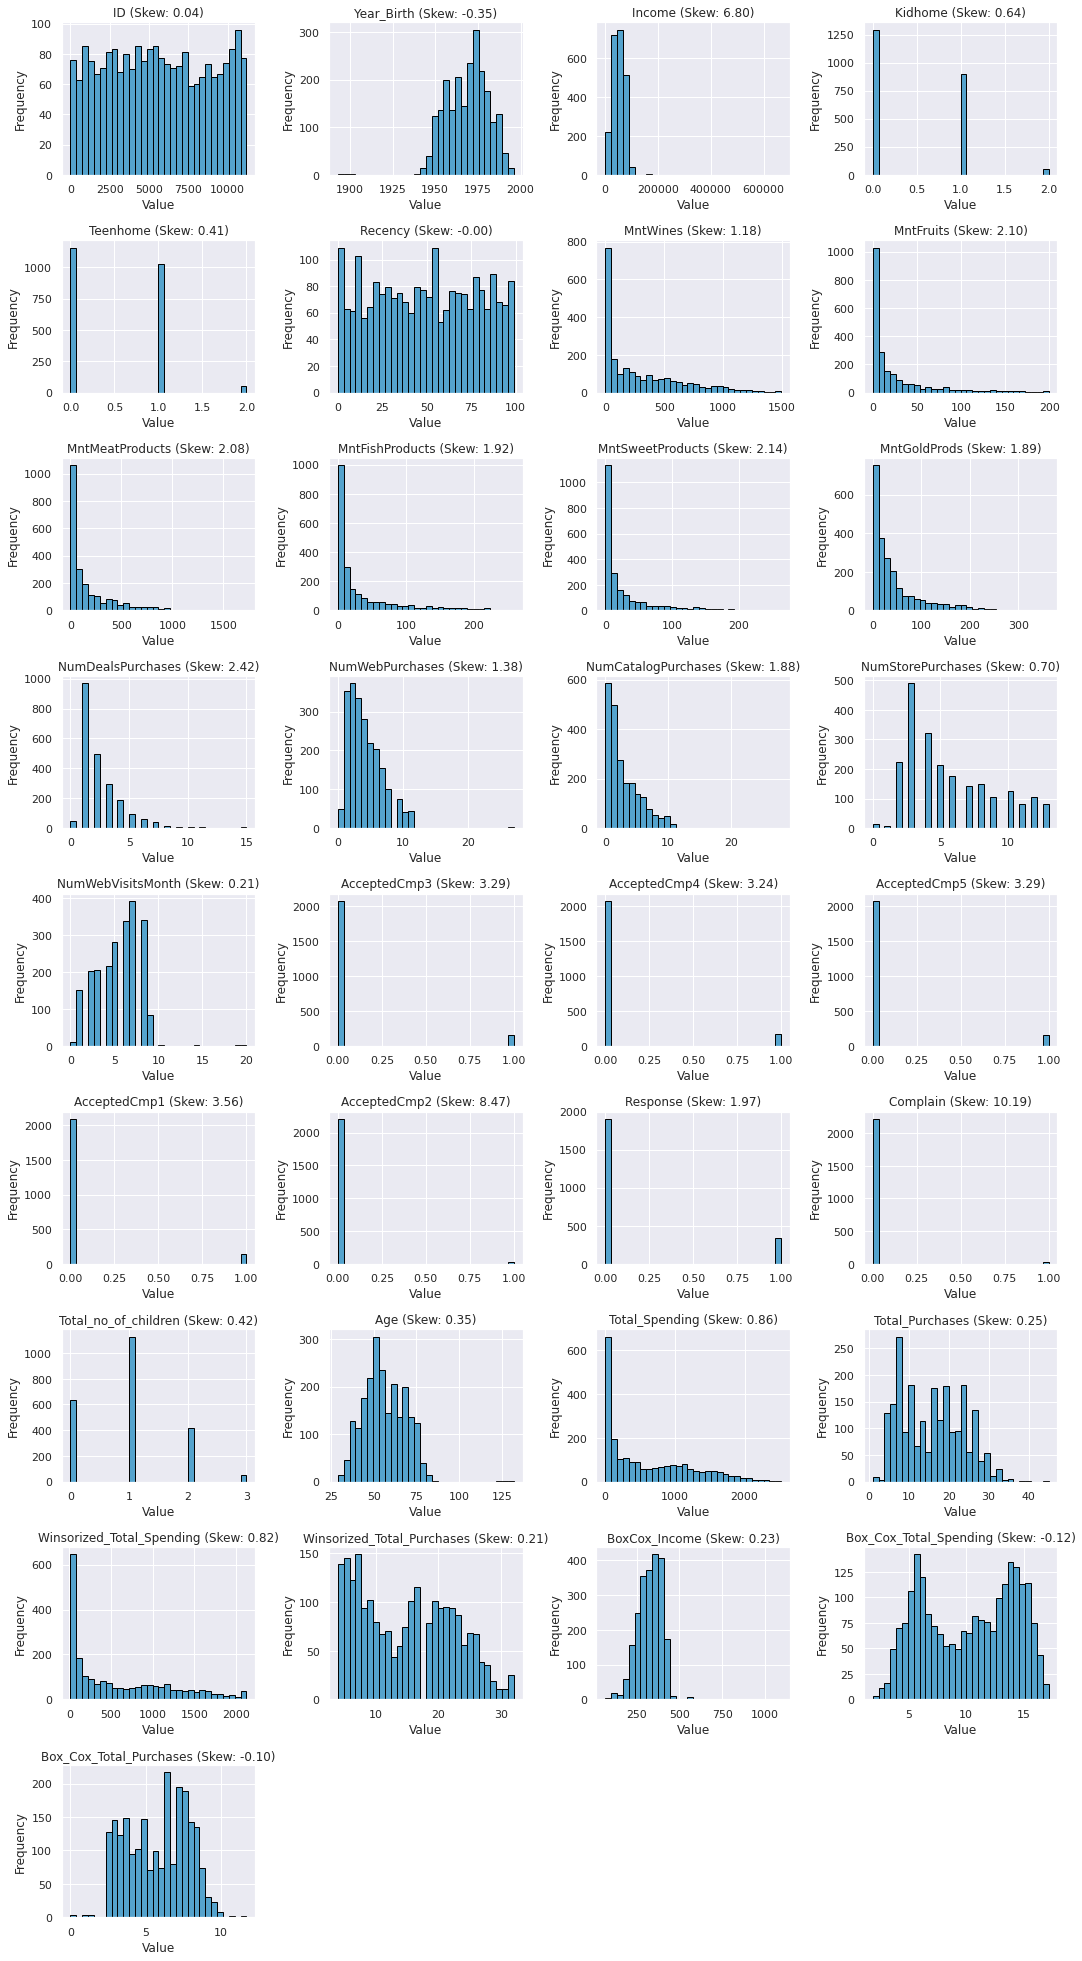

In [16]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
import matplotlib.cm as cm

# Identify categorical columns
ordinal_columns = ['Education']  # Example: Ordinal data with a meaningful order
nominal_columns = ['Marital_Status', 'Country']
country_categories = ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']
columns_to_check = ['Marital_Status_Divorced','Country_CA']


#Applying onehot_encoder nominal encoding for marital status and country
missing_columns = [col for col in columns_to_check if col not in df.columns]
if missing_columns:
  if df.columns.isin(nominal_columns).any():
    for i, column in enumerate(nominal_columns, 1):

      onehot_encoder = OneHotEncoder(sparse_output=False, drop=None,dtype='int')
      onehot_encoded = onehot_encoder.fit_transform(df[[column]])

      # Create a DataFrame for the one-hot encoded columns
      encoded_columns = [f"{column}_{cat}" for cat in onehot_encoder.categories_[0]]
      print(encoded_columns)
      df = pd.concat([df, pd.DataFrame(onehot_encoded, columns=encoded_columns)], axis=1)

# Apply ordinal encoding for Education
ordinal_mapping = {
    'Education': ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
}
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_columns],dtype='int')
df['Education_Encoded'] = ordinal_encoder.fit_transform(df[ordinal_columns])


print("\nFirst 5 rows after One Hot Encoding of Marital Status & Country:")
print(df.head())



cols_Ignore =['Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married',
 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO',
'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US','Education_Encoded']


# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns_to_keep = [col for col in numerical_columns if col not in cols_Ignore]

# Determine grid size
num_columns = len(numerical_columns)
rows = (num_columns // 4) + 1  # Adjust rows based on number of columns
cols = 4  # Set number of columns for the grid


# Plot histograms after  Data Transformation
print('Verify skewness after data transformation')
plt.figure(figsize=(15, rows * 3))  # Adjust figure size dynamically
for i, column in enumerate(columns_to_keep, 1):
    if i > rows * cols:  # Avoid exceeding subplot limits
        break

    plt.subplot(rows, cols, i)
    plt.hist(df[column].dropna(), bins=30,  edgecolor='black')
    plt.title(f'{column} (Skew: {df[column].skew():.2f})')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()











**6. Generate a heatmap to illustrate the correlation between different pairs of variables.**

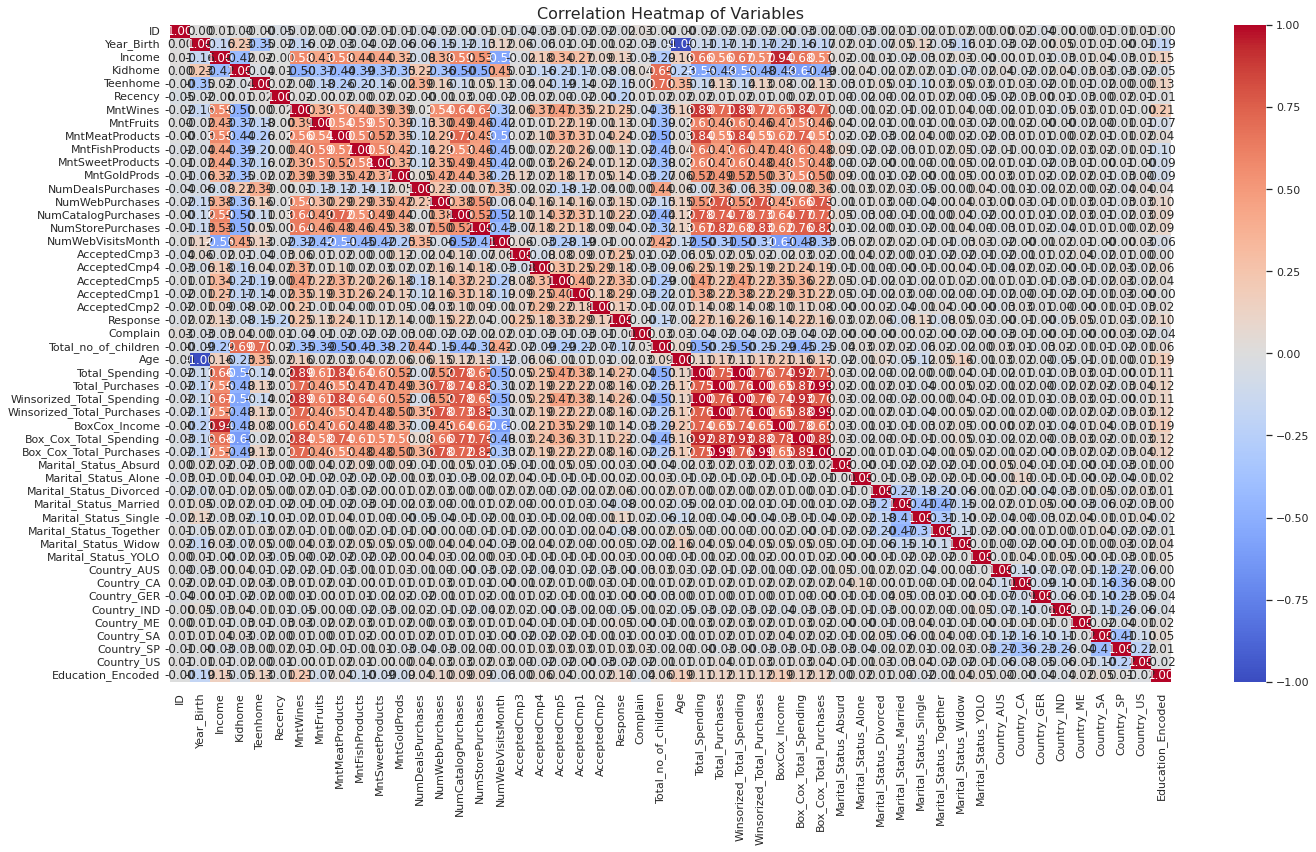

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title for better interpretation
plt.title("Correlation Heatmap of Variables", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()



**7. Test the following hypotheses:**

     a. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

**Define the Hypotheses**
* Null Hypothesis (H₀): Age is not significantly associated with preference for in-store shopping.
* Alternative Hypothesis (H₁): Older individuals have a significantly higher preference for in-store shopping.

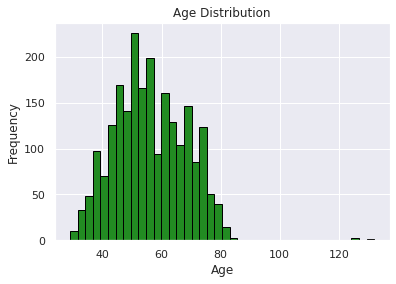

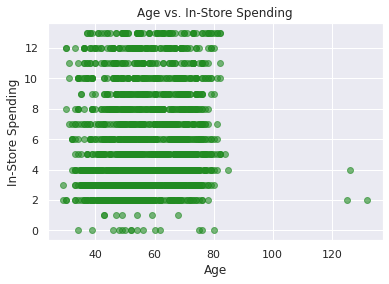

Filtered Correlations with Age:
NumStorePurchases      0.128272
NumWebPurchases        0.145040
NumDealsPurchases      0.060846
NumCatalogPurchases    0.121275
NumWebVisitsMonth     -0.121139
Total_Spending         0.111306
Total_Purchases        0.168304
Age                    1.000000
Name: Age, dtype: float64
F-Statistic: 20.89188158800022421246
P-value: 0.00000000102439528285
Reject the null hypothesis: Significant differences in in-store shopping preference among age groups.


In [20]:
from scipy.stats import f_oneway

# Plot histogram to verfify the data distribution 
df['Age'].hist(bins=40, color='forestgreen',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
numeric_data = df.select_dtypes(include=['float64', 'int64'])

plt.scatter(df['Age'], df['NumStorePurchases'],color='forestgreen', alpha=0.6)
plt.title("Age vs. In-Store Spending")
plt.xlabel("Age")
plt.ylabel("In-Store Spending")
plt.show()



columns_of_interest = ['NumStorePurchases', 'NumWebPurchases','NumDealsPurchases','NumCatalogPurchases','NumWebVisitsMonth','Total_Spending','Total_Purchases']  
correlation_with_age_filtered = df[columns_of_interest + ['Age']].corr()['Age']


print("Filtered Correlations with Age:")
print(correlation_with_age_filtered)


# Create age groups
bins = [1, 30, 60, 140]  # Example: Young (<30), Middle-aged (30-60), Older (>60)
labels = ['1-30', '30-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


# Group data by age group
groups = [df[df['Age_Group'] == group]['NumStorePurchases'] for group in labels]

# Perform one-way ANOVA 
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat:.20f}")
print(f"P-value: {p_value:.20f}")

alpha = 0.05
# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: Significant differences in in-store shopping preference among age groups.")
else:
    print("Accept the null hypothesis: No significant differences in in-store shopping preference among age groups.")





    b. Customers with children likely experience time constraints, making online shopping a more convenient option.

**Define the Hypotheses**
* Null Hypothesis (H₀): Customers with children do not spend significantly more online compared to customers without children.
* Alternative Hypothesis (H₁): Customers with children spend significantly more online compared to customers without children.

The DataFrame has with_children (1602,) rows 
The DataFrame has without_children (638,) rows 


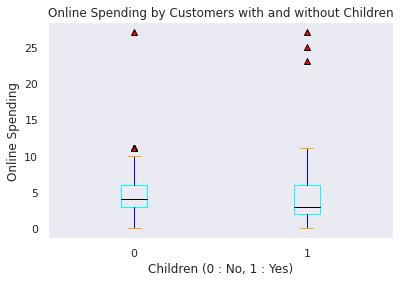

T-Statistic: -3.541893836382714
P-Value: 0.0004108102700005601
Reject the null hypothesis. Customers with children spend significantly more online.


In [23]:
from scipy.stats import ttest_ind

#Filter the data to find customers with or with out children
with_children = df[(df.Kidhome >= 1) | (df.Teenhome >= 1)]['NumWebPurchases']
without_children =  df[(df.Kidhome == 0) & (df.Teenhome == 0)]['NumWebPurchases']

rows = with_children.shape
print(f"The DataFrame has with_children {rows} rows ")

rows1 = without_children.shape
print(f"The DataFrame has without_children {rows1} rows ")

#categorize function to find with or without kids customer
def categorize_family(children, teens):
    if children == 0 and teens == 0:
        return 0
    elif children >=1  or teens >= 1:
        return 1
    
# Visualize the data with box plot
data_copy=df.copy()
data_copy['Have_Child']=data_copy.apply(lambda row: categorize_family(row['Kidhome'], row['Teenhome']), axis=1)
# Create boxplots
data_copy.boxplot(
    column='NumWebPurchases',
    by='Have_Child',
    grid=False,
    boxprops=dict(color='cyan'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='orange'),
    flierprops=dict(markerfacecolor='red', marker='^')
)
plt.title('Online Spending by Customers with and without Children')
plt.suptitle('')
plt.xlabel('Children (0 : No, 1 : Yes)')
plt.ylabel('Online Spending')
plt.show()


# Perform two-sample t-test  for hypothesis
t_stat, p_value = ttest_ind(with_children, without_children, equal_var=False)  # Welch's t-test for unequal variances
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis. Customers with children spend significantly more online.")
else:
    print("Accept the null hypothesis: No significant difference in online spending.")
    









    c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

**Define the Hypotheses**
* Null Hypothesis (H₀): There is no significant difference between physical store sales and alternative channel sales.
* Alternative Hypothesis (H₁): Physical store sales are significantly lower due to cannibalization by alternative distribution channels.





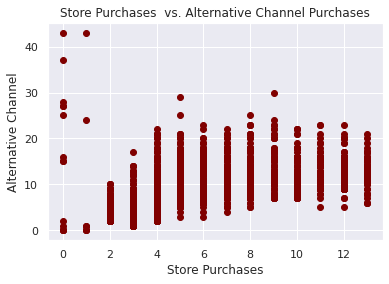

T-Statistic: -24.82880037407809
P-Value: 5.4175550489229195e-126
Reject the null hypothesis: Significant relationship between Store and other alternative purchases (Online,Catalog and discount).


In [24]:
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import plotly.graph_objects as go
import plotly.express as px

# Compute correlation matrix for sales channels
sales_columns = ['NumStorePurchases', 'NumWebPurchases','NumDealsPurchases','NumCatalogPurchases']
correlation_matrix = df[sales_columns].corr()

data_copy=df.copy()
#Filter the store and alternative purchases
store_purchase = data_copy['NumStorePurchases']
alternative_purchase = data_copy['NumWebPurchases']+data_copy['NumDealsPurchases']+data_copy['NumCatalogPurchases']





# Visualize with scatter plot to visualize the data
plt.scatter(store_purchase,alternative_purchase , color='maroon')
plt.title('Store Purchases  vs. Alternative Channel Purchases')
plt.xlabel('Store Purchases')
plt.ylabel('Alternative Channel')
plt.show()



#perform independent T test
t_stat, p_value = ttest_ind(store_purchase, alternative_purchase, equal_var=False)  # Use equal_var=False if variances are unequal

# Output the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Significant relationship between Store and other alternative purchases (Online,Catalog and discount).")
else:
    print("Accept the null hypothesis: No significant relationship between Store  and alternative purchases (Online,Catalog and discount).")






    d. Does the United States significantly outperform the rest of the world in total purchase volumes?

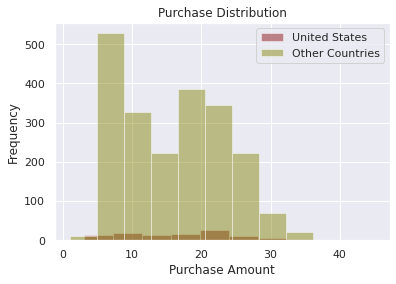

Z-score: 1.7015448173296308
P-value: 0.08884072956501243
Accept the null hypothesis: No significant difference between the United States and the rest of the world.


In [25]:

from scipy.stats import norm



# Country' and 'TotalPurchases' with actual column names
us_data = df[df['Country'] == 'US']['Total_Purchases'].reset_index(drop=True)

non_us_data = df[df['Country'] != 'US']['Total_Purchases'].reset_index(drop=True)


# Visualize with histogram data of us & other countries 
plt.hist(us_data, bins=10, alpha=0.45,color='maroon', label='United States')
plt.hist(non_us_data, bins=10, alpha=0.45,color='olive',label='Other Countries')
# Customize plot
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Purchase Distribution')
plt.legend()
# Show plot
plt.show()




# Calculate statistics for the two groups
mean_us = us_data.mean()
std_us = us_data.std()
n_us = len(us_data)

mean_non_us = non_us_data.mean()
std_non_us = non_us_data.std()
n_non_us = len(non_us_data)



# Calculate the Z-score
z_score = (mean_us - mean_non_us) / np.sqrt((std_us**2 / n_us) + (std_non_us**2 / n_non_us))

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

# Display the results
print("Z-score:", z_score)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The United States significantly outperforms the rest of the world.")
else:
    print("Accept the null hypothesis: No significant difference between the United States and the rest of the world.")


**8. Use appropriate visualization to help analyze the following:**

      a. Identify the top-performing products and those with the lowest revenue.

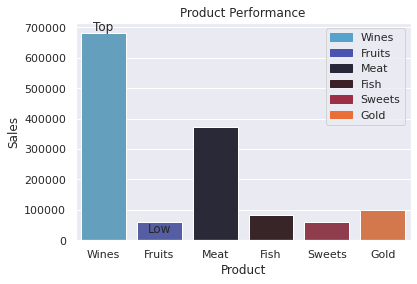

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#Find sum of the different category of products
MntWinesSum=df.MntWines.sum()
MntFruitsSum=df['MntFruits'].sum()
MntMeatProductsSum=df['MntMeatProducts'].sum()
MntFishProducts=df['MntFishProducts'].sum()
MntSweetProductsSum=df['MntSweetProducts'].sum()
MntGoldProdsSum=df['MntGoldProds'].sum()




#Creating dataset for products & sales
product_data = {}
product_data["Products"] = ['Wines','Fruits','Meat','Fish','Sweets','Gold']
product_data["Sales"] =[MntWinesSum,MntFruitsSum,MntMeatProductsSum,MntFishProducts,MntSweetProductsSum,MntGoldProdsSum]


prod_df = pd.DataFrame(product_data)

colors = sns.color_palette('inferno', n_colors=4)

# Find indices of top and low performers
top_index = prod_df['Sales'].idxmax()
low_index = prod_df['Sales'].idxmin()

# Define colors for top, low, and other products
top_color = 'green'
low_color = 'red'
other_color = 'lightgray'

# Create a list of colors
colors = [other_color] * len(df)
colors[top_index] = top_color
colors[low_index] = low_color

# Create the barplot with custom colors
sns.barplot(x='Products', y='Sales', data=prod_df, palette='icefire')
colors = sns.color_palette('icefire', n_colors=6)

# Customize the plot
plt.title("Product Performance")
plt.xlabel("Product")
plt.ylabel("Sales")

# Annotate top and low performers
plt.text(top_index, prod_df['Sales'][top_index], 'Top', ha='center', va='bottom')
plt.text(low_index, prod_df['Sales'][low_index], 'Low', ha='center', va='top')

# Add a legend
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[0], label='Wines'),
                  plt.Rectangle((0, 0), 1, 1, color=colors[1], label='Fruits'),
                  plt.Rectangle((0, 0), 1, 1, color=colors[2], label='Meat'),
                  plt.Rectangle((0, 0), 1, 1, color=colors[3], label='Fish'),
                  plt.Rectangle((0, 0), 1, 1, color=colors[4], label='Sweets'),
                  plt.Rectangle((0, 0), 1, 1, color=colors[5], label='Gold')]
plt.legend(handles=legend_handles)

plt.show()


      b. Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

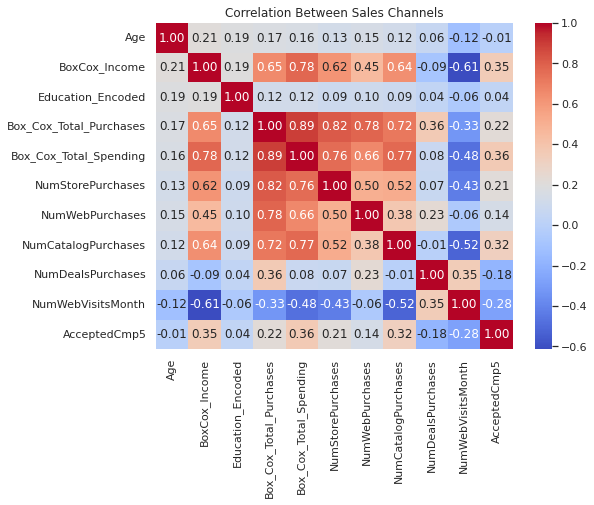

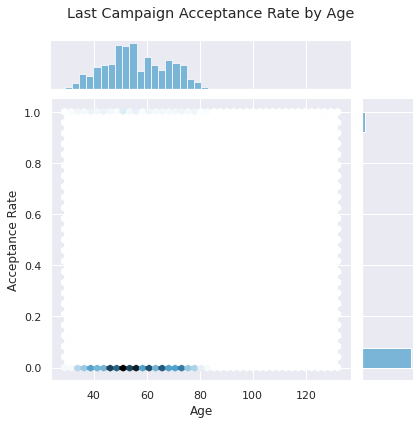

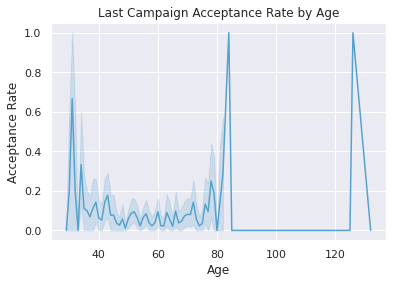

Correlation between Age and Acceptance Rate: -0.00712254153598751


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




sales_columns=['Age','BoxCox_Income','Education_Encoded','Box_Cox_Total_Purchases','Box_Cox_Total_Spending','NumStorePurchases','NumWebPurchases',
               'NumCatalogPurchases','NumDealsPurchases','NumWebVisitsMonth','AcceptedCmp5']
#find coreletion for array values
correlation_matrix = df[sales_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sales Channels")
plt.show()

# Create a Joint Plot to analyze age and last campaign corelation
joint = sns.jointplot(x='Age', y='AcceptedCmp5', data=df, kind='hex')
# Adjust the title position
plt.subplots_adjust(top=0.9)
plt.xlabel("Age")
plt.ylabel("Acceptance Rate")
# Set the title for the figure
joint.fig.suptitle('Last Campaign Acceptance Rate by Age')
plt.show()



# Create the lineplot to analyze age and last campaign corelation
sns.lineplot(x='Age', y='AcceptedCmp5', data=df)
plt.title("Last Campaign Acceptance Rate by Age")
plt.xlabel("Age")
plt.ylabel("Acceptance Rate")
plt.show()

# Calculate correlation coefficient
correlation = df['Age'].corr(df['AcceptedCmp5'])
print(f"Correlation between Age and Acceptance Rate: {correlation}")


**Result Analysis**
This analysis suggests that customer age has minimal or no impact on their likelihood of accepting the last campaign.

      c. Determine the country with the highest number of customers who accepted the last campaign.

  Country  Count
0      SP     89
1      CA     21
2      SA     21
3     AUS     13
4     GER      8
5     IND      6
6      US      5
0


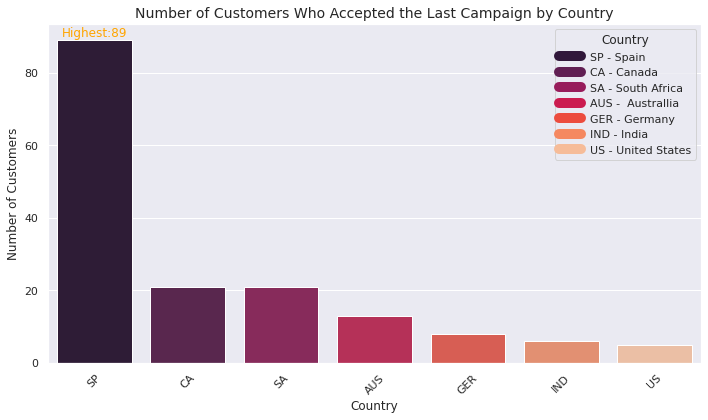

In [19]:




# Filter data for customers who accepted the last campaign
accepted_campaign =  df[df['AcceptedCmp5'] == 1]

# Count the number of customers by country
country_counts = accepted_campaign['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
print(country_counts)
top_index = country_counts['Count'].idxmax()
max_value = country_counts['Count'].max()
print(top_index)
custom_labels=['SP - Spain','CA - Canada','SA - South Africa','AUS -  Australlia','GER - Germany','IND - India','US - United States']
colors = sns.color_palette('rocket', n_colors=7)




# Create a bar plot to visualize the country accepted the last campaign
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts, x='Country', y='Count',palette='rocket')
plt.title('Number of Customers Who Accepted the Last Campaign by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.text(top_index, country_counts['Count'][top_index], f'Highest:{max_value}',color='orange', ha='center', va='bottom')
plt.legend(handles=[
    plt.Line2D([0], [0], color=colors[0], lw=10, label=custom_labels[0]),
    plt.Line2D([0], [0], color=colors[1], lw=10, label=custom_labels[1]),
    plt.Line2D([0], [0], color=colors[2], lw=10, label=custom_labels[2]),
    plt.Line2D([0], [0], color=colors[3], lw=10, label=custom_labels[3]),
    plt.Line2D([0], [0], color=colors[4], lw=10, label=custom_labels[4]),
    plt.Line2D([0], [0], color=colors[5], lw=10, label=custom_labels[5]),
    plt.Line2D([0], [0], color=colors[6], lw=10, label=custom_labels[6]),
], title='Country', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()



      d. Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

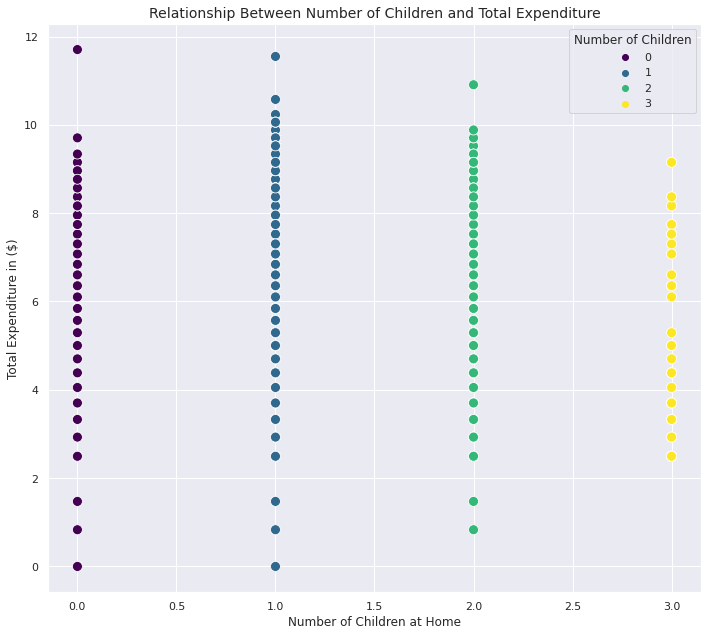

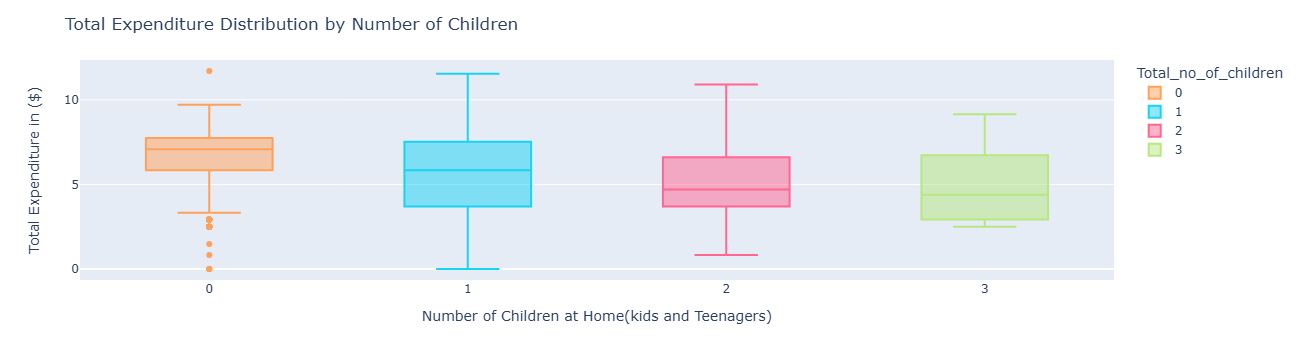

In [29]:
import plotly.express as px


# Scatter plot to visualize there  is a discernible pattern in the number of children at home and the total expenditure.
plt.figure(figsize=(10, 9))
sns.scatterplot(data=df, x='Total_no_of_children', y='Box_Cox_Total_Purchases', hue='Total_no_of_children', palette='viridis', s=100)
plt.title('Relationship Between Number of Children and Total Expenditure', fontsize=14)
plt.xlabel('Number of Children at Home', fontsize=12)
plt.ylabel('Total Expenditure in ($)', fontsize=12)
plt.legend(title='Number of Children',loc='upper right')
plt.tight_layout()
plt.show()

# Plotly box to visualize there  is a discernible pattern in the number of children at home and the total expenditure.
fig = px.box(df, x="Total_no_of_children", y="Box_Cox_Total_Purchases",color='Total_no_of_children',
             color_discrete_map={'0': 'blue', '1': 'green', '2': 'red','3':'yellow'})
fig.update_layout(
    title='Total Expenditure Distribution by Number of Children',
    xaxis_title='Number of Children at Home(kids and Teenagers)',
    yaxis_title='Total Expenditure in ($)'
)



# Show the plot
fig.show()








**Result Pattern Analyze:**
  * As the number of children at home increases, the median total expenditure decreases.
  * Variability in spending increases with the number of children, suggesting a wider range of spending behaviors in households with more children.
  * Households with no children (Children = 0) tend to spend more consistently and at a higher median level.

      e. Analyze the educational background of customers who lodged complaints in the last two years. 

   Education_Encoded  Complain       Education
1                  2        14    1 - 2n Cycle
0                  1         4  2 - Graduation
2                  3         2      3 - Master
3                  4         1          4- PhD


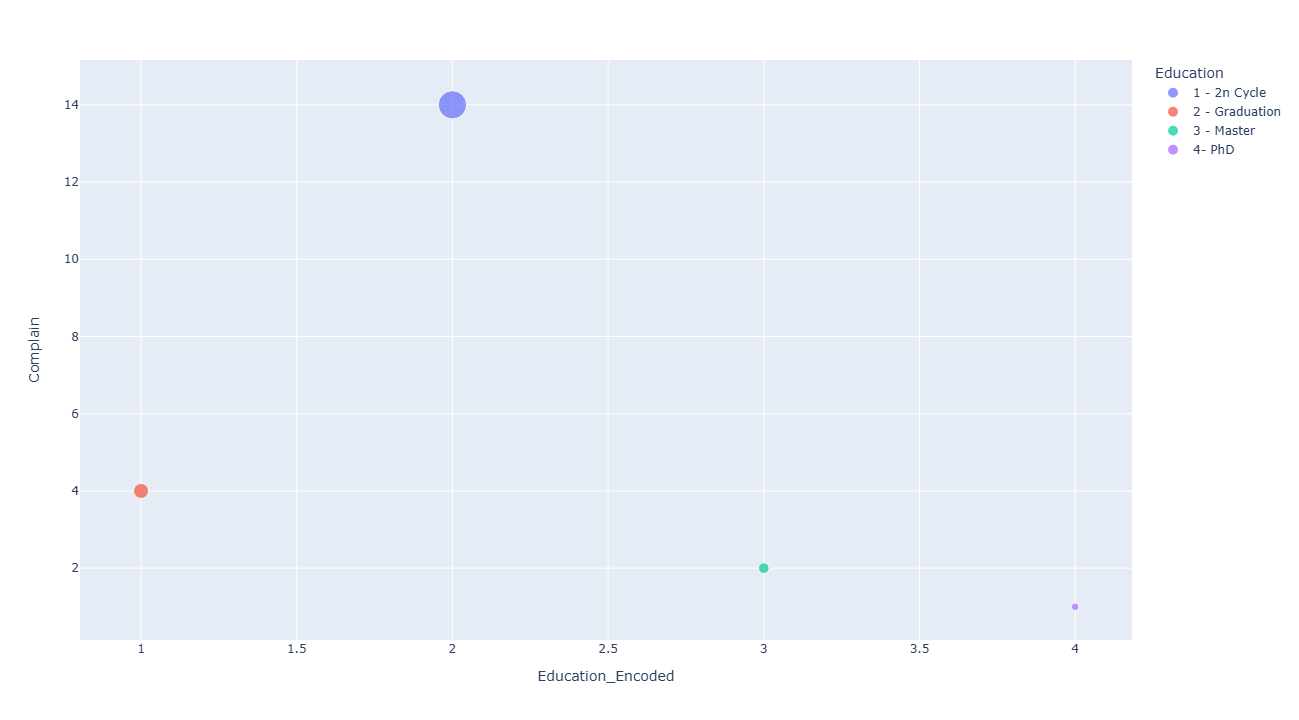

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


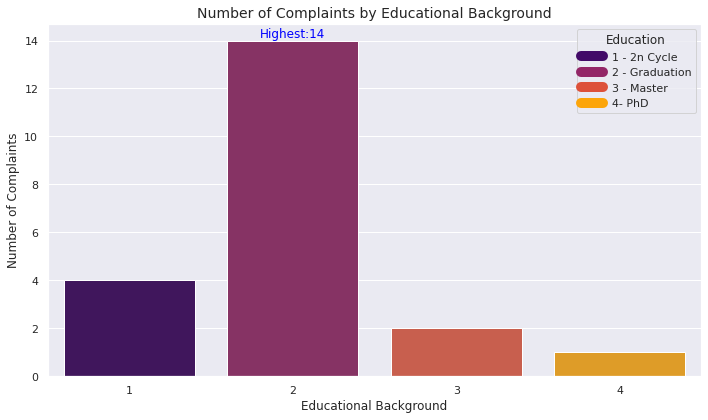

In [18]:
import plotly.express as px

#Filter to get only data with complaints
complaints_data = df[df['Complain'] > 0]

# Group by educational background and count the number of complaints
education_complaints = complaints_data.groupby('Education_Encoded')['Complain'].sum().reset_index()


# Sort the data by the number of complaints
education_complaints = education_complaints.sort_values(by='Complain', ascending=False)


custom_labels = ['1 - 2n Cycle', '2 - Graduation', '3 - Master', '4- PhD']
education_complaints['Education']=custom_labels

#setting the color palette
colors = sns.color_palette('inferno', n_colors=4)

#getting the max value and id to show in diagram
top_index=education_complaints['Complain'].idxmax()
max_value = education_complaints['Complain'].max()


# Create a plotly scatter plot to visualize the distibution of data
fig = px.scatter(education_complaints, x="Education_Encoded", y="Complain", color="Education",size='Complain')
# Show the interactive plot
fig.show()


# Visualization: Bar plot for complaints by education level
plt.figure(figsize=(10, 6))
sns.barplot(data=education_complaints, x='Education_Encoded',y='Complain',palette='inferno')
plt.text(top_index, education_complaints['Complain'][top_index], f'Highest:{max_value}',color='blue', ha='center', va='bottom')
plt.title('Number of Complaints by Educational Background', fontsize=14)
plt.xlabel('Educational Background', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.legend(title='Education',loc='upper right')
plt.legend(handles=[
    plt.Line2D([0], [0], color=colors[0], lw=10, label=custom_labels[0]),
    plt.Line2D([0], [0], color=colors[1], lw=10, label=custom_labels[1]),
    plt.Line2D([0], [0], color=colors[2], lw=10, label=custom_labels[2]),
    plt.Line2D([0], [0], color=colors[3], lw=10, label=custom_labels[3]),
], title='Education', loc='upper right')
plt.tight_layout()
plt.show()









